In [243]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from collections import Counter
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore", category=FutureWarning)

import plotly.express as px

import networkx as nx

import joypy

import plotly.graph_objs as go

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Milestone 1: Data Collection and Cleaning

# Data collection

In [247]:
# Reading from excel files
df = pd.read_csv("covid_19_clean_complete.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [248]:
df.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [251]:
df.shape

(49068, 10)

# Correcting Inconsistencies

In [254]:
#check missing value 
missing_values = df.isnull().sum()
missing_values 

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [256]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 10)


# Milestone 2: Exploratory Data Analysis (EDA)

# Descriptive Statistics

In [260]:
# Display basic statistics
print(df.describe())

                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06  


In [262]:
#R3: Show all statistics of deaths
df['Deaths'].describe()

count     49068.000000
mean        884.179160
std        6313.584411
min           0.000000
25%           0.000000
50%           2.000000
75%          30.000000
max      148011.000000
Name: Deaths, dtype: float64

# Correlations Analysis

In [265]:
c = np.corrcoef(df['Active'],df['Deaths'])
print('Correlations between Deaths and Active\n',c)

Correlations between Deaths and Active
 [[1.         0.89185823]
 [0.89185823 1.        ]]


# Data Visualization

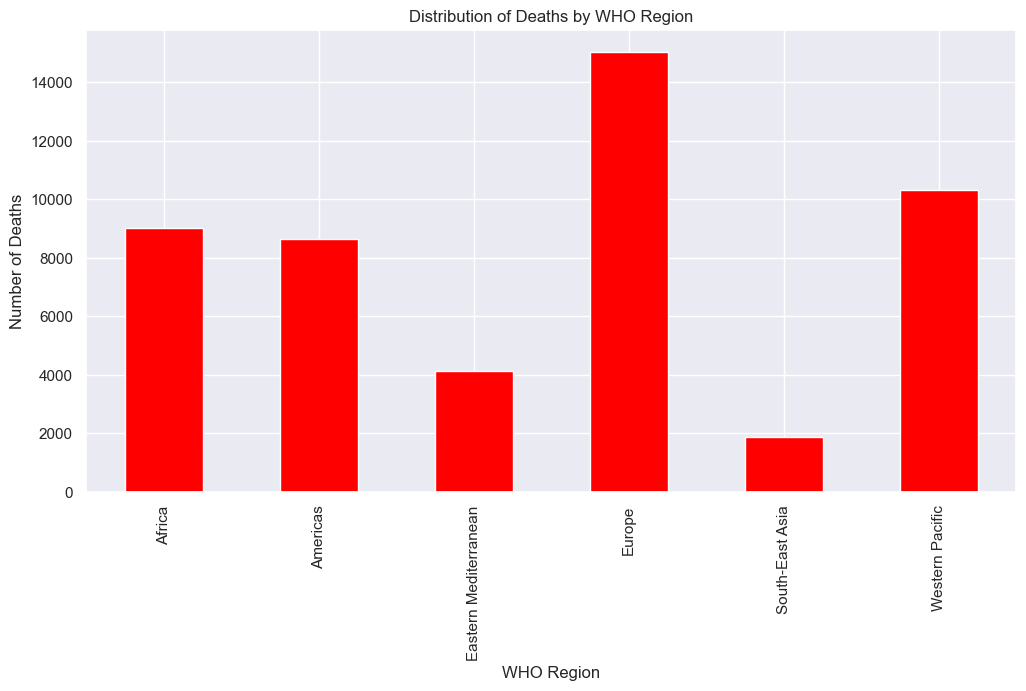

In [268]:
plt.figure(figsize=(12, 6))
df['WHO Region'].value_counts().sort_index().plot(kind='bar', color='Red')
plt.title('Distribution of Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Deaths')
plt.show()

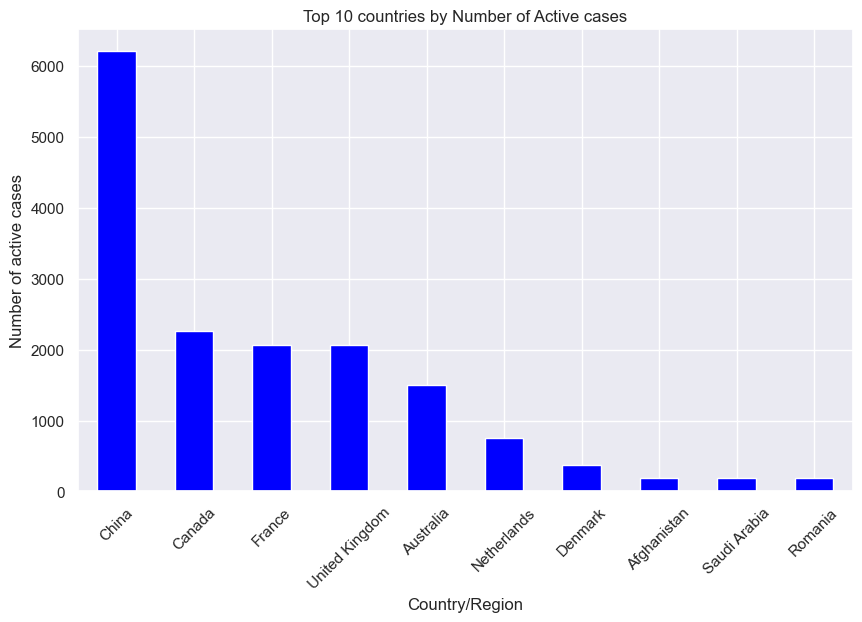

In [270]:
top_country = df['Country/Region'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_country.plot(kind='bar', color='blue')
plt.title('Top 10 countries by Number of Active cases')
plt.xlabel('Country/Region')
plt.ylabel('Number of active cases')
plt.xticks(rotation=45)
plt.show()

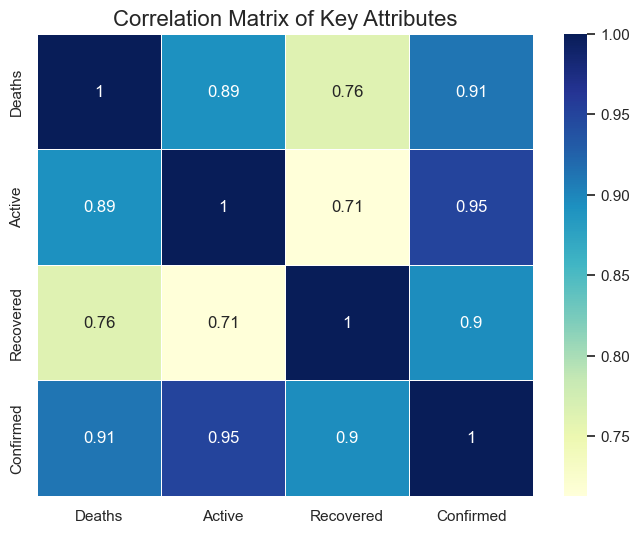

In [223]:
correlation_data = df[['Deaths', 'Active', 'Recovered', 'Confirmed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Key Attributes', fontsize=16)
plt.show()

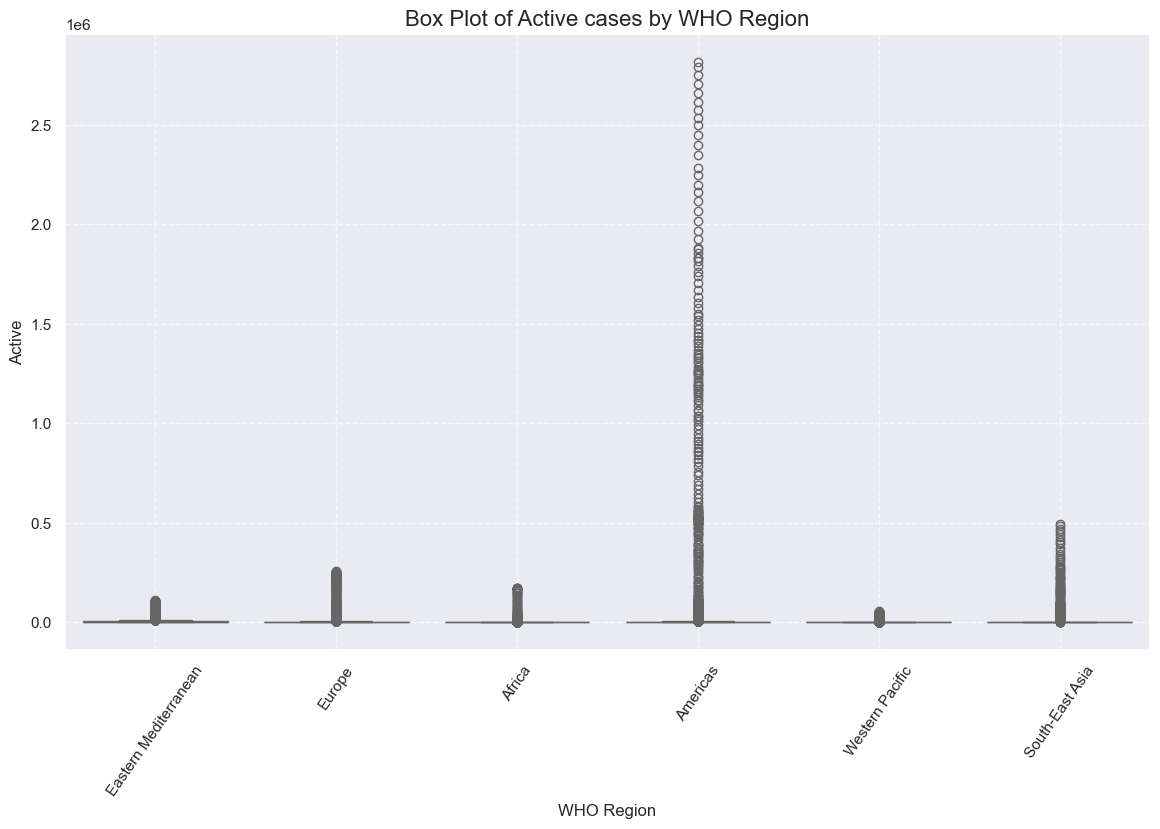

In [231]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='WHO Region', y='Active', palette='Set3')
plt.title('Box Plot of Active cases by WHO Region', fontsize=16)
plt.xlabel('WHO Region')
plt.ylabel('Active')
plt.xticks(rotation=55)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()